# **Importer les bibliothèques nécéssaires**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# **Prétriatement de données**

In [2]:
df= pd.read_csv('players_22.csv')
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8940\450323861.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [3]:
df.isna().sum().sum()

152618

In [4]:
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

**supprimer les colonnes inutiles**

nous laissons seulement les caractéristiques personnelles, physiques et techniques

In [5]:
new_df = df.drop(columns=["sofifa_id", 'international_reputation', "player_url", "dob", "short_name", "long_name", "player_positions", "overall", "value_eur", "wage_eur", "club_team_id", "club_name", "league_name", "league_level", "club_position", "club_jersey_number", "club_loaned_from", "club_loaned_from", "club_joined", "club_contract_valid_until", "nationality_id", "nation_team_id", "nation_position", "nation_jersey_number", "real_face", "release_clause_eur", "player_tags", "player_traits", "player_face_url", "club_logo_url", "club_flag_url", "nation_logo_url", "nation_flag_url", 'gk', 'rb', 'rcb', 'cb', 'lcb', 'lb', 'rwb', 'rdm', 'cdm', 'ldm', 'lwb', 'rm', 'rcm', 'cm', 'lcm', 'lm', 'ram', 'cam', 'lam', 'rw', 'rf', 'cf', 'lf', 'lw', 'rs', 'st', 'ls'], axis=1)
new_df

,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,34,170,72,Argentina,Left,4,4,Medium/Low,Unique,...,96,20,35,24,6,11,15,14,8,NaN
1,92,32,185,81,Poland,Right,4,4,High/Medium,Unique,...,88,35,42,19,15,6,12,8,10,NaN
2,91,36,187,83,Portugal,Right,4,5,High/Low,Unique,...,95,24,32,24,7,11,15,14,11,NaN
3,91,29,175,68,Brazil,Right,5,5,High/Medium,Unique,...,93,35,32,29,9,9,15,15,11,NaN
4,91,30,181,70,Belgium,Right,5,4,High/High,Unique,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,52,22,180,64,China PR,Right,3,2,Medium/Medium,Lean (170-185),...,37,38,43,48,6,10,5,15,13,NaN
19235,59,19,175,70,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,47,37,44,47,11,12,6,8,10,NaN
19236,55,21,178,72,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,36,38,44,48,8,6,7,10,6,NaN
19237,60,19,173,66,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,47,10,14,11,7,10,7,14,15,NaN


In [6]:
zone = {
    'GoalKeeper' : 'gk',
    'Defender' : ['rb', 'rcb', 'cb', 'lcb', 'lb', 'rwb', 'lwb', 'rdm', 'cdm', 'ldm'],
    'Middfielder' : ['rdm', 'cdm', 'ldm','rcm', 'cm', 'lcm', 'rm', 'lm', 'ram', 'cam', 'lam'],
    'Forward' : ['ram', 'cam', 'lam', 'rw', 'rf', 'cf', 'lf', 'rw', 'lw', 'rs', 'st', 'ls']
}

zone_indices = {
    'GoalKeeper' : 0,
    'Defender' : 1,
    'Middfielder' : 2,
    'Forward' : 3
}
game_zone = []
for i in range(df['player_positions'].shape[0]):
  gk = 0
  deff = 0
  midd = 0
  att = 0
  positions = df['player_positions'].iloc[i].lower().split(sep=', ')
  for pos in positions:
    if pos in zone['GoalKeeper']:
      gk+=1
    if pos in zone['Defender']:
      deff+=1
    if pos in zone['Middfielder']:
      midd+=1
    if pos in zone['Forward']:
      att+=1
  max = np.max([gk, deff, midd, att])
  if max == gk:
    game_zone.append('GoalKeeper')
  elif max == deff:
    game_zone.append('Defender')
  elif max == midd:
    game_zone.append('Middfielder')
  elif max == att:
    game_zone.append('Forward')

df['game_zone'] = game_zone
new_df['game_zone'] = game_zone

In [7]:
new_df

,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,game_zone
0,93,34,170,72,Argentina,Left,4,4,Medium/Low,Unique,...,20,35,24,6,11,15,14,8,NaN,Forward
1,92,32,185,81,Poland,Right,4,4,High/Medium,Unique,...,35,42,19,15,6,12,8,10,NaN,Forward
2,91,36,187,83,Portugal,Right,4,5,High/Low,Unique,...,24,32,24,7,11,15,14,11,NaN,Forward
3,91,29,175,68,Brazil,Right,5,5,High/Medium,Unique,...,35,32,29,9,9,15,15,11,NaN,Forward
4,91,30,181,70,Belgium,Right,5,4,High/High,Unique,...,68,65,53,15,13,5,10,13,NaN,Middfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,52,22,180,64,China PR,Right,3,2,Medium/Medium,Lean (170-185),...,38,43,48,6,10,5,15,13,NaN,Defender
19235,59,19,175,70,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,37,44,47,11,12,6,8,10,NaN,Middfielder
19236,55,21,178,72,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,38,44,48,8,6,7,10,6,NaN,Middfielder
19237,60,19,173,66,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,10,14,11,7,10,7,14,15,NaN,Forward


In [8]:
new_df['game_zone'] = new_df['game_zone'].map(zone_indices)
new_df

,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,game_zone
0,93,34,170,72,Argentina,Left,4,4,Medium/Low,Unique,...,20,35,24,6,11,15,14,8,NaN,3
1,92,32,185,81,Poland,Right,4,4,High/Medium,Unique,...,35,42,19,15,6,12,8,10,NaN,3
2,91,36,187,83,Portugal,Right,4,5,High/Low,Unique,...,24,32,24,7,11,15,14,11,NaN,3
3,91,29,175,68,Brazil,Right,5,5,High/Medium,Unique,...,35,32,29,9,9,15,15,11,NaN,3
4,91,30,181,70,Belgium,Right,5,4,High/High,Unique,...,68,65,53,15,13,5,10,13,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,52,22,180,64,China PR,Right,3,2,Medium/Medium,Lean (170-185),...,38,43,48,6,10,5,15,13,NaN,1
19235,59,19,175,70,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,37,44,47,11,12,6,8,10,NaN,2
19236,55,21,178,72,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,38,44,48,8,6,7,10,6,NaN,2
19237,60,19,173,66,Republic of Ireland,Right,3,2,Medium/Medium,Lean (170-185),...,10,14,11,7,10,7,14,15,NaN,3


**Replacer les valeurs manquantes par la moyennes des colonnes**

In [9]:
nan_df_columns = new_df.columns[new_df.isna().any()].tolist()

In [10]:
mean_values = {col: new_df[col].mean() for col in nan_df_columns if not np.isnan(new_df[col].mean())}
mean_values

{'pace': 68.21307067282399,
 'shooting': 52.3452972467411,
 'passing': 57.31256210907816,
 'dribbling': 62.56117378850763,
 'defending': 51.70363009294441,
 'physic': 64.82328871222306,
 'goalkeeping_speed': 36.43996247654784}

In [11]:
# Replace NaN values with the corresponding mean value of each column
for col, mean_val in mean_values.items():
    new_df[col].fillna(mean_val, inplace=True)
print(new_df.columns[new_df.isna().any()].tolist())

[]


**Convertir les colonnes catégoriques au numérique**

In [12]:
categorical_columns = new_df.select_dtypes(include=['object']).columns

nationality_name = new_df['nationality_name'].unique()
preferred_foot = new_df['preferred_foot'].unique()
work_rate = new_df['work_rate'].unique()
body_type = new_df['body_type'].unique()

nationalities = {}
prefered_foots = {}
work_rates = {}
body_types = {}

def categorical2numerical(category_dict, category):
  for i, cat in enumerate(category):
    category_dict[cat] = i
  return category_dict

nationalities = categorical2numerical(nationalities, nationality_name)
prefered_foots = categorical2numerical(prefered_foots, preferred_foot)
work_rates = categorical2numerical(work_rates, work_rate)
body_types = categorical2numerical(body_types, body_type)

# Replace categorical values with numerical values
new_df['nationality_name'] = new_df['nationality_name'].replace(nationalities)
new_df['preferred_foot'] = new_df['preferred_foot'].replace(prefered_foots)
new_df['work_rate'] = new_df['work_rate'].replace(work_rates)
new_df['body_type'] = new_df['body_type'].replace(body_types)

new_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [13]:
new_df

,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,game_zone
0,93,34,170,72,0,0,4,4,0,0,...,20,35,24,6,11,15,14,8,36.439962,3
1,92,32,185,81,1,1,4,4,1,0,...,35,42,19,15,6,12,8,10,36.439962,3
2,91,36,187,83,2,1,4,5,2,0,...,24,32,24,7,11,15,14,11,36.439962,3
3,91,29,175,68,3,1,5,5,1,0,...,35,32,29,9,9,15,15,11,36.439962,3
4,91,30,181,70,4,1,5,4,3,0,...,68,65,53,15,13,5,10,13,36.439962,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,52,22,180,64,59,1,3,2,4,2,...,38,43,48,6,10,5,15,13,36.439962,1
19235,59,19,175,70,68,1,3,2,4,2,...,37,44,47,11,12,6,8,10,36.439962,2
19236,55,21,178,72,68,1,3,2,4,2,...,38,44,48,8,6,7,10,6,36.439962,2
19237,60,19,173,66,68,1,3,2,4,2,...,10,14,11,7,10,7,14,15,36.439962,3


In [14]:
X = new_df.drop(columns='game_zone')
y = new_df['game_zone']

**Fractionnement de données en données d'entrainement, de validation et de test**

In [15]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Further split the training data into train and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

# Display the shapes of the resulting dataframes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (13467, 51), (13467,)
Validation set shape: (2886, 51), (2886,)
Testing set shape: (2886, 51), (2886,)


In [16]:
# Optionally, combine back into dataframes
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

# Display the shape of the train and test dataframes
print(f"Train DataFrame Shape: {train_df.shape}")
print(f"Validation DataFrame Shape: {val_df.shape}")
print(f"Test DataFrame Shape: {test_df.shape}")

Train DataFrame Shape: (13467, 52)
Validation DataFrame Shape: (2886, 52)
Test DataFrame Shape: (2886, 52)


In [17]:
train_df.to_csv('training.csv')
val_df.to_csv('validation.csv')
test_df.to_csv('test.csv')

In [18]:
train_df = pd.read_csv('training.csv')
val_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')


**Equilibré les données**

In [19]:
train_df['game_zone'].value_counts()

game_zone
1    5045
2    4518
3    2386
0    1518
Name: count, dtype: int64

Base de données non équilibrée
Pour y voir plus clair, calculons les pourcentages de chaque zone de jeu :

Total Instances: 5045 + 4518 + 2386 + 1518 = 13467

**Percentage Calculation:**
*   Game Zone 1: 5045 / 13467 × 100 ≈ 37.46 %
*   Game Zone 2: 4518 / 13467 × 100 ≈ 33.54 %
*   Game Zone 3: 2386 / 13467 × 100 ≈ 17.71 %
*   Game Zone 0: 1518 / 13467 × 100 ≈ 11.27 %

Cela indique que les données sont quelque peu déséquilibrées, la zone de jeu 1 ayant la représentation la plus élevée et la zone de jeu 0 la plus faible. Selon l'application, ce déséquilibre devra peut-être être corrigé, en particulier si vous envisagez d'utiliser ces données à des fins d'apprentissage automatique, car des données déséquilibrées peuvent affecter les performances du modèle.

In [20]:
val_df['game_zone'].value_counts()

game_zone
1    1106
2     973
3     509
0     298
Name: count, dtype: int64

In [21]:
test_df['game_zone'].value_counts()

game_zone
1    1119
2     941
3     510
0     316
Name: count, dtype: int64

In [22]:
X_train = train_df.drop(columns=['Unnamed: 0', 'game_zone'], axis=1)
y_train = train_df['game_zone']

X_val = val_df.drop(columns=['Unnamed: 0', 'game_zone'], axis=1)
y_val = val_df['game_zone']

X_test = test_df.drop(columns=['Unnamed: 0', 'game_zone'], axis=1)
y_test = test_df['game_zone']

X_train.describe(include='all')

,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,...,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000,13467.000000
mean,71.073884,25.228039,181.327022,75.003267,29.837232,0.762605,2.941338,2.347739,3.347071,2.565456,...,57.908666,46.431796,47.839385,45.718274,16.495359,16.295389,16.147175,16.332591,16.617806,36.449923
std,6.130381,4.759216,6.865839,7.110654,29.924621,0.425502,0.669599,0.767612,1.627811,1.779069,...,12.225667,20.242412,21.295317,20.813867,17.706475,16.967068,16.678850,17.203915,18.015497,3.583371
min,49.000000,16.000000,155.000000,51.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,67.000000,21.000000,176.000000,70.000000,7.000000,1.000000,3.000000,2.000000,2.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,36.439962
50%,71.000000,25.000000,181.000000,75.000000,17.000000,1.000000,3.000000,2.000000,4.000000,2.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.439962
75%,75.000000,29.000000,186.000000,80.000000,47.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,36.439962
max,93.000000,54.000000,203.000000,110.000000,162.000000,1.000000,5.000000,5.000000,8.000000,9.000000,...,95.000000,92.000000,93.000000,91.000000,91.000000,89.000000,93.000000,92.000000,90.000000,65.000000


In [23]:
X_train.head()

,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,63,29,172,68,56,0,3,2,1,1,...,43,57,62,61,9,11,8,13,13,36.439962
1,66,30,170,63,64,0,4,2,4,5,...,55,62,66,68,15,7,14,5,5,36.439962
2,63,27,175,75,152,0,3,2,4,1,...,62,58,64,56,6,11,14,15,7,36.439962
3,76,25,165,66,0,1,5,3,2,5,...,72,25,27,25,7,14,10,11,8,36.439962
4,68,28,169,63,10,1,3,3,4,5,...,64,49,38,38,8,9,9,13,9,36.439962


In [24]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_val_balanced, y_val_balanced = smote.fit_resample(X_val, y_val)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)

In [25]:
y_train_balanced.value_counts()

game_zone
1    5045
3    5045
2    5045
0    5045
Name: count, dtype: int64

In [26]:
y_val_balanced.value_counts()

game_zone
0    1106
3    1106
1    1106
2    1106
Name: count, dtype: int64

In [27]:
y_test_balanced.value_counts()

game_zone
2    1119
1    1119
0    1119
3    1119
Name: count, dtype: int64

In [28]:
y_train_balanced.shape, y_val_balanced.shape, y_test_balanced.shape

((20180,), (4424,), (4476,))

**Visualisation des données Q-Q Plot (Quantile-Quantile Plot)**

1.   ***LA COLONNE 'Potential'***

**Observations du tracé QQ :**

*   Les points de données sur le graphique suivent de près une ligne diagonale, indiquant un bon ajustement avec les quantiles théoriques d'une distribution normale.
*   Il n'y a pas d'écart significatif à la hausse ou à la baisse, ce qui suggère une asymétrie minime.

**Confirmation de la valeur R au carré :**

*   La valeur R² élevée de 0,9955 renforce encore les preuves de normalité. Une valeur R² aussi proche de 1 suggère une forte corrélation entre les données et la distribution normale.

**Dans l'ensemble:**

Avec à la fois l'inspection visuelle du tracé Q-Q et la valeur R² élevée, on peut conclure sans risque de se tromper que la colonne « Potential » présente une distribution très proche de la normale.

2.   ***LA COLONNE 'Age'***

**Observations du tracé QQ :**

*   La plupart des points de données suivent une ligne diagonale, indiquant un bon ajustement avec les quantiles théoriques d'une distribution normale.
*   Il existe quelques écarts, notamment pour les valeurs d'âge inférieures et supérieures.
*   Il semble y avoir une légère courbure vers le haut au niveau des queues, ce qui pourrait suggérer une possibilité d'inclinaison positive. Cela signifie qu’il pourrait y avoir plus de points de données concernant les âges plus jeunes par rapport à une distribution parfaitement normale.

**Confirmation de la valeur R au carré :**

*   La valeur R² de 0,9717 est encore relativement élevée, indiquant une bonne adéquation globale avec la normalité. Cependant, il est légèrement inférieur à celui de la colonne "Potentiel" (0,9955), qui correspond aux observations du graphique Q-Q.

**Dans l'ensemble:**

Alors que la colonne "Âge" montre un ajustement correct avec une distribution normale, la présence d'une courbure dans les queues, en particulier pour les plus jeunes, suggère une éventuelle légère asymétrie positive.

3.   ***LA COLONNE 'height_cm'***

**Observations du tracé QQ :**

*   Les points de données sur le graphique suivent de très près une ligne diagonale, indiquant un bon ajustement avec les quantiles théoriques d'une distribution normale.
*   Il existe des écarts minimes vers le haut ou vers le bas, suggérant une asymétrie négligeable.

**Confirmation de la valeur R au carré :**

*   La valeur R² très élevée de 0,9961 suggère fortement une distribution normale. Une valeur R² aussi proche de 1 indique une très forte corrélation entre les données et la distribution normale.

**Dans l'ensemble:**

Avec à la fois l'inspection visuelle du tracé Q-Q et la valeur R² élevée, on peut conclure sans risque de se tromper que la colonne "heigth_cm" présente une distribution très proche de la normale.

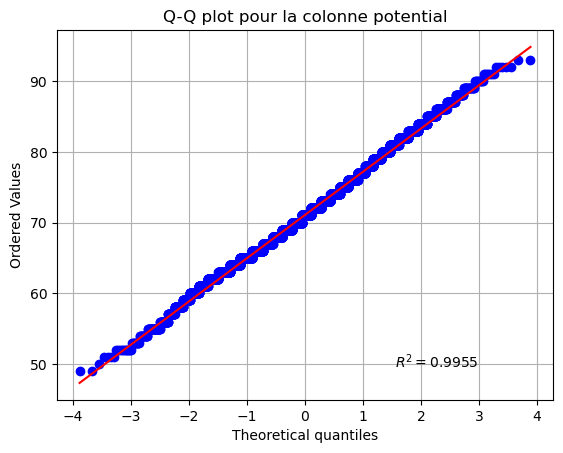

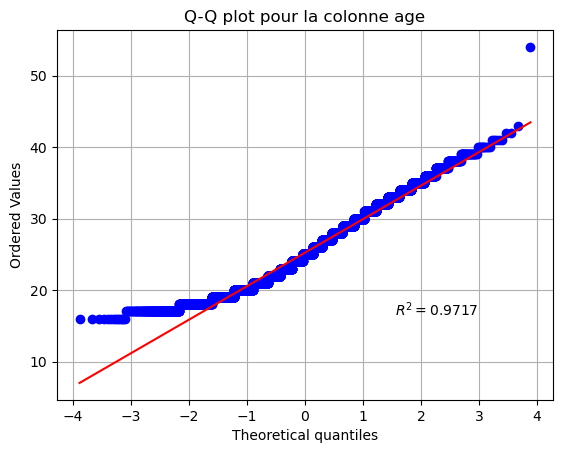

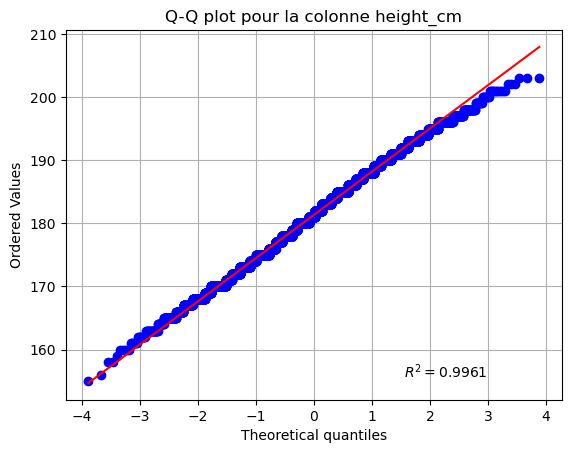

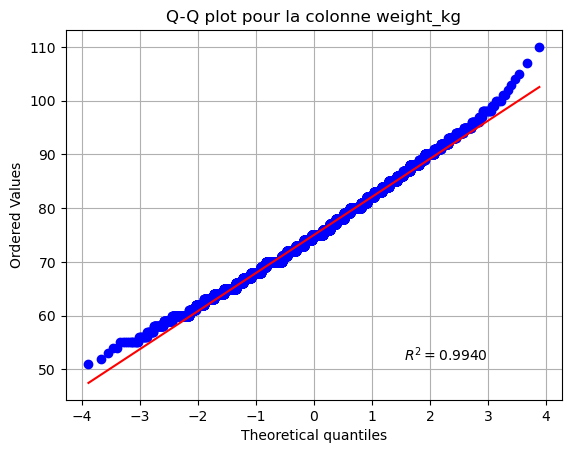

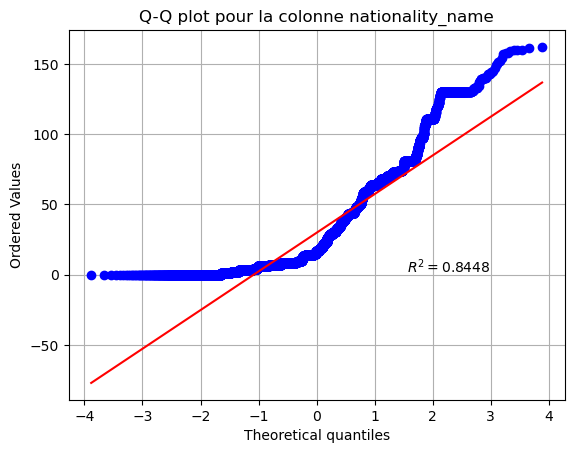

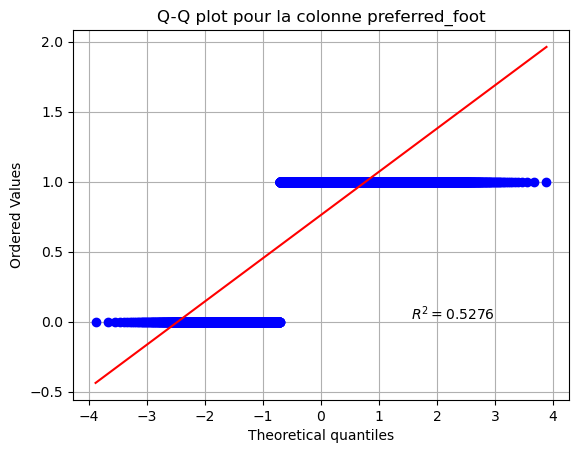

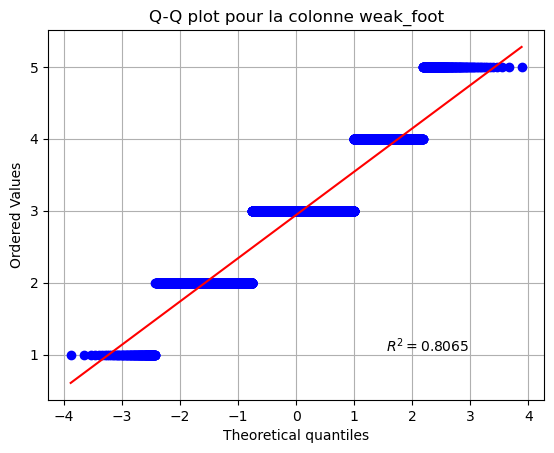

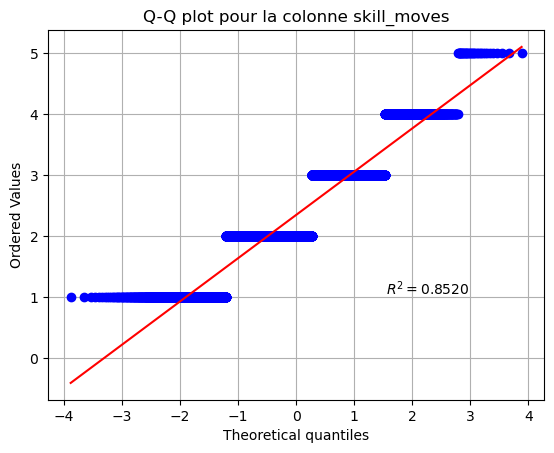

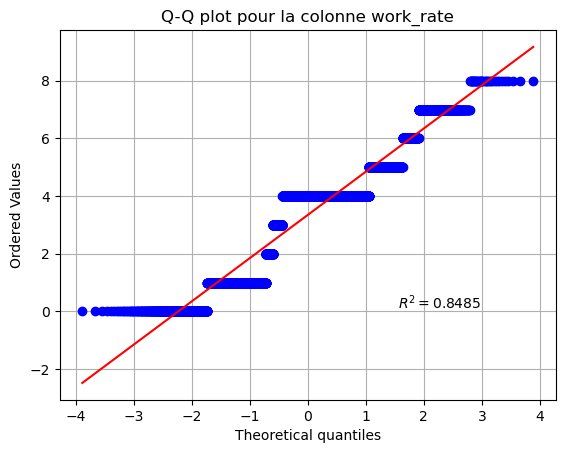

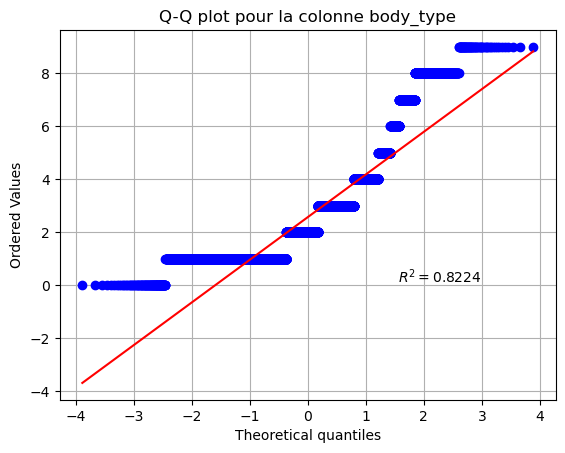

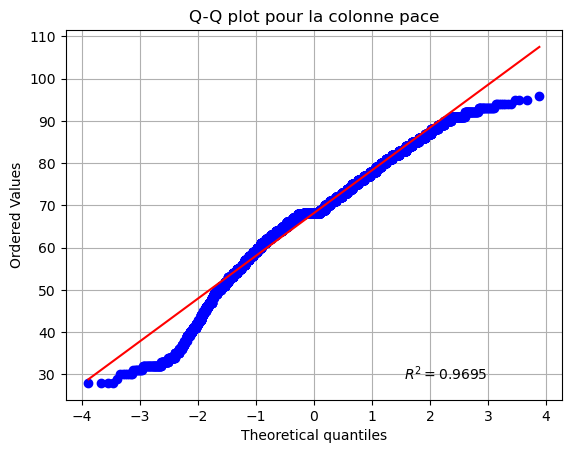

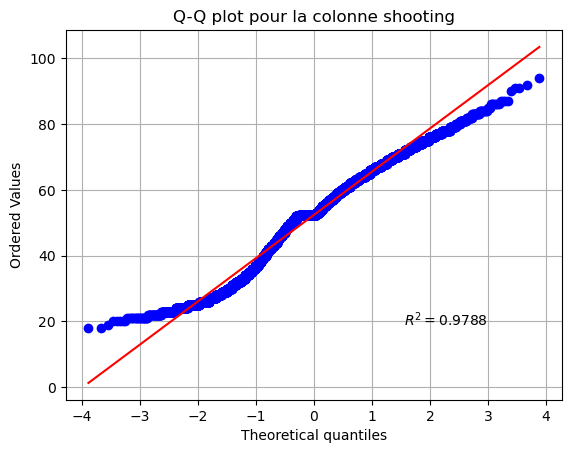

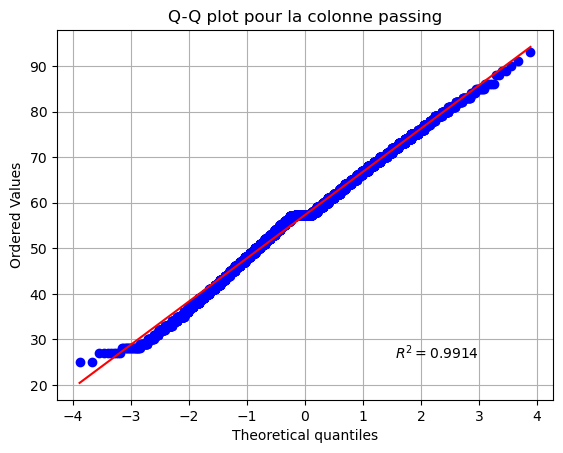

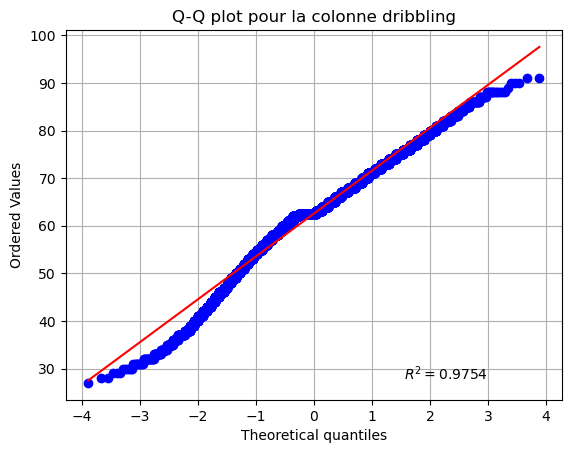

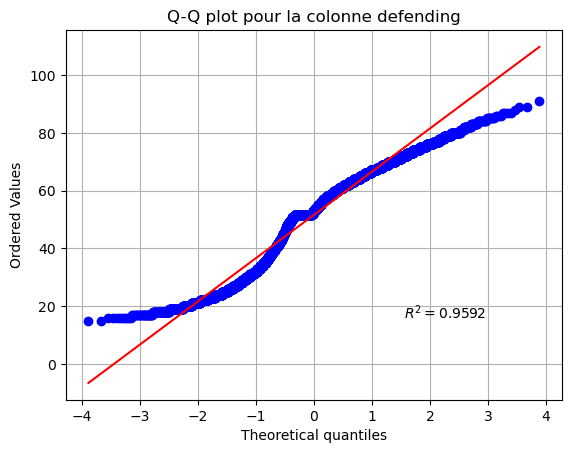

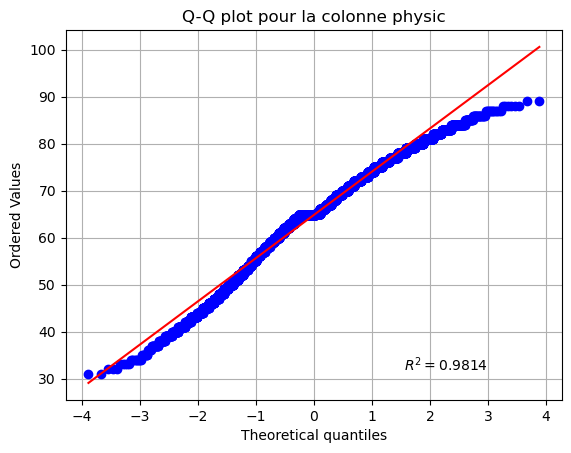

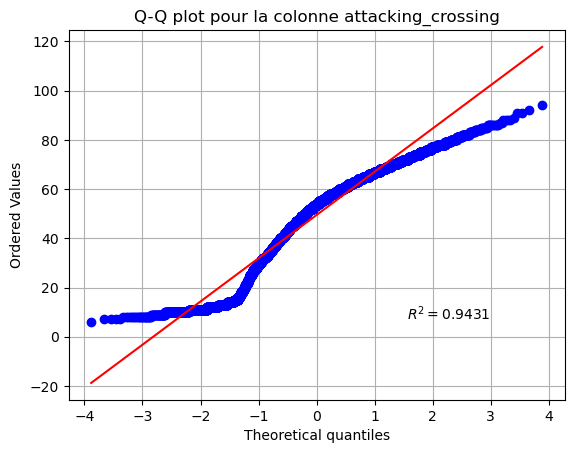

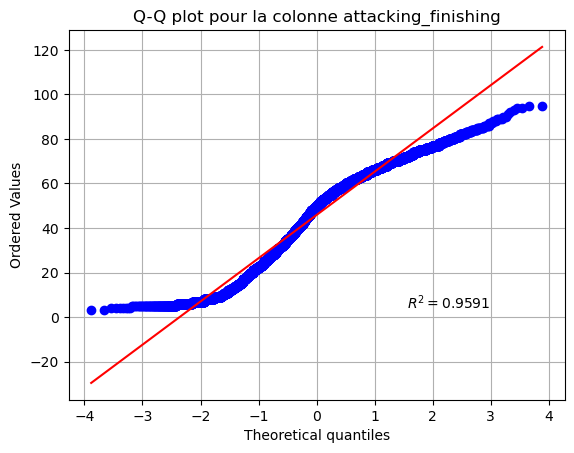

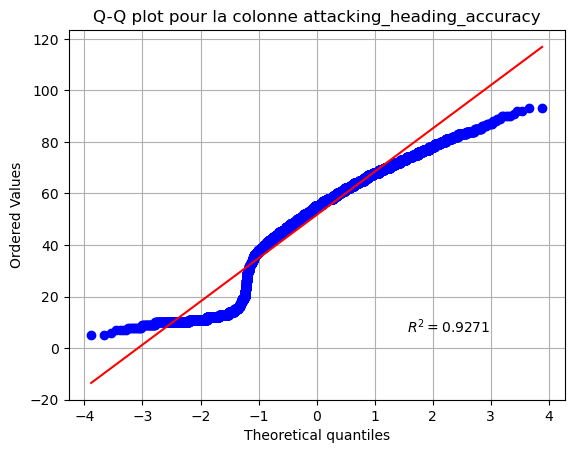

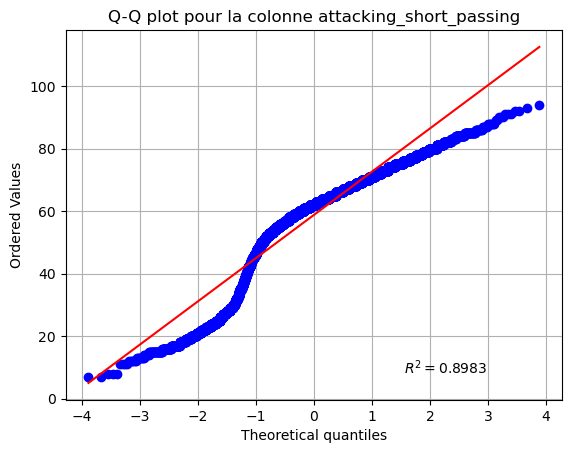

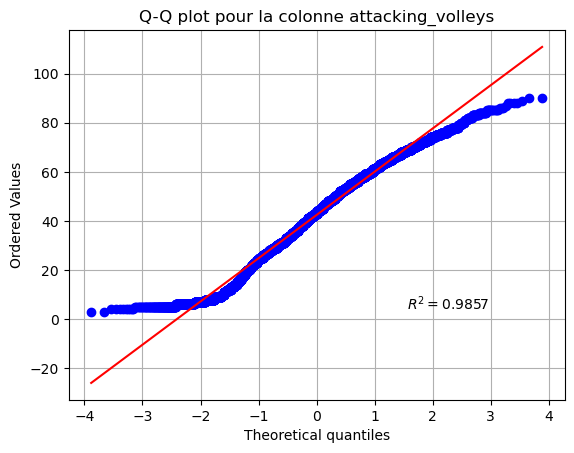

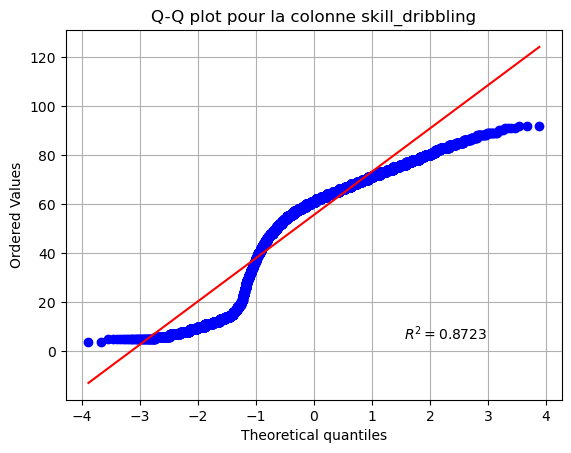

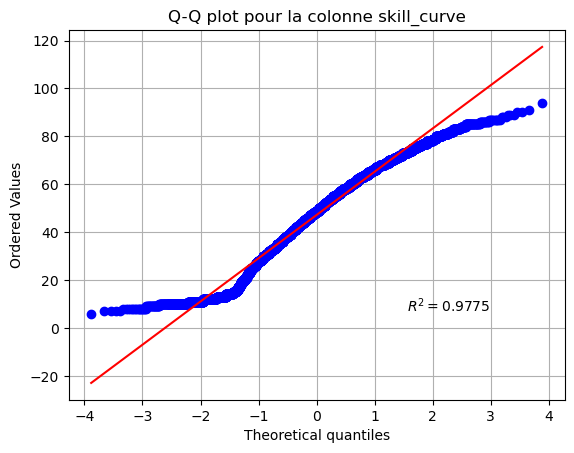

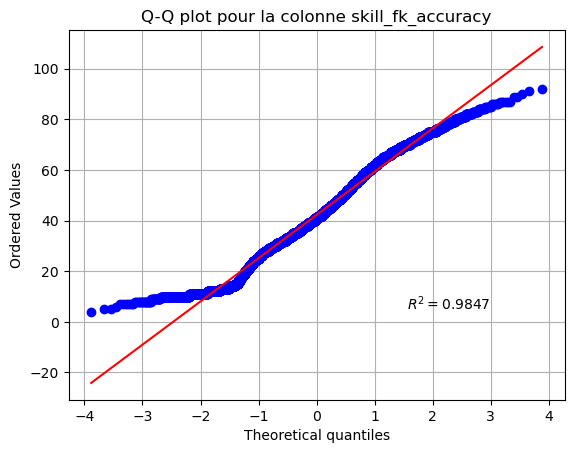

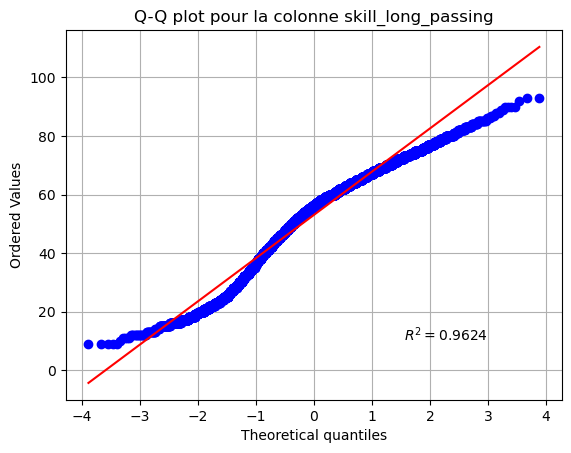

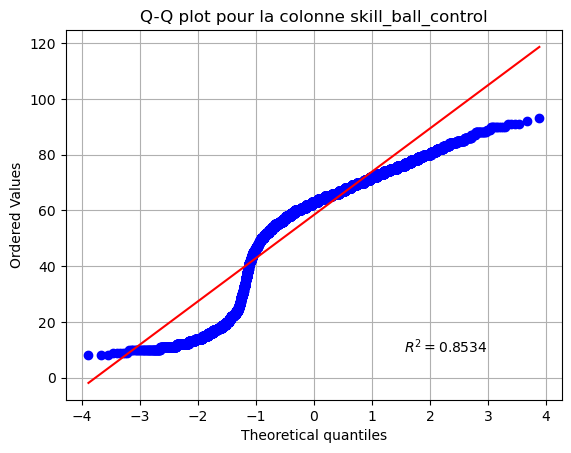

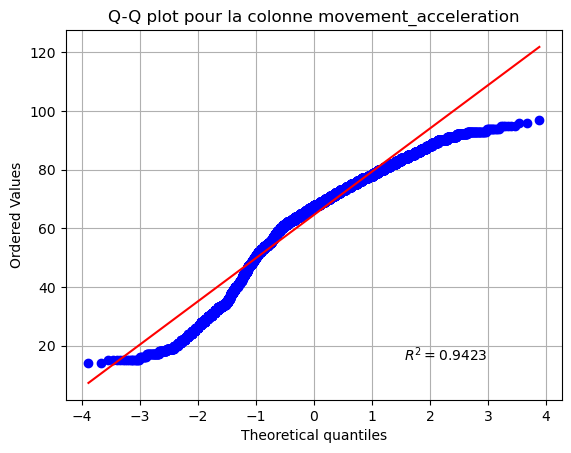

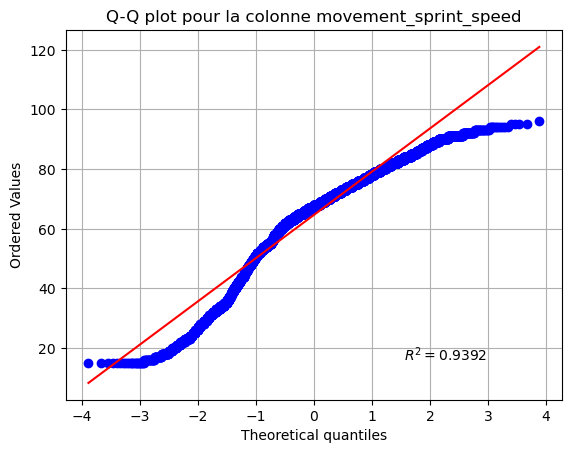

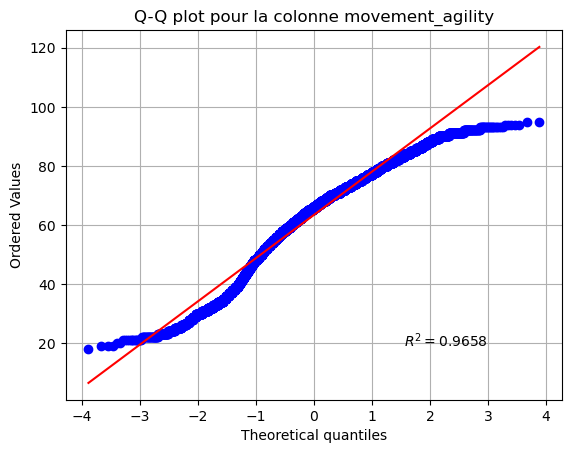

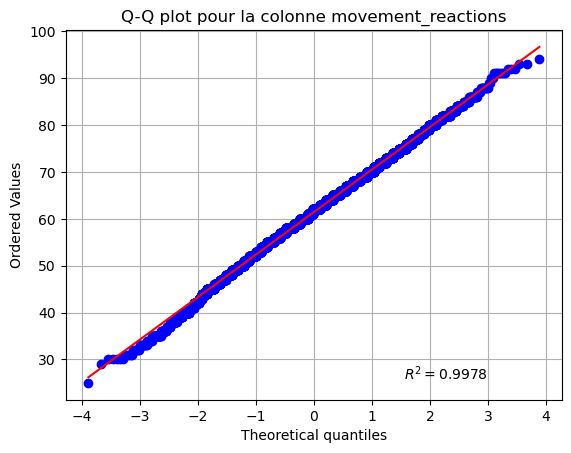

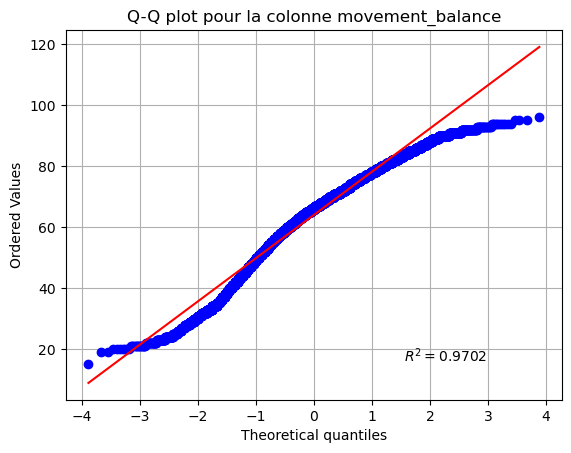

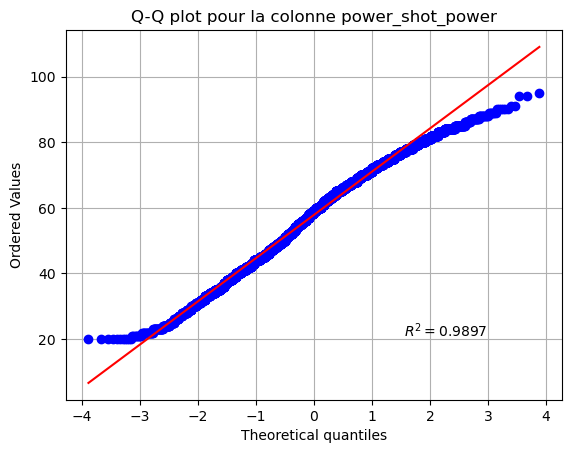

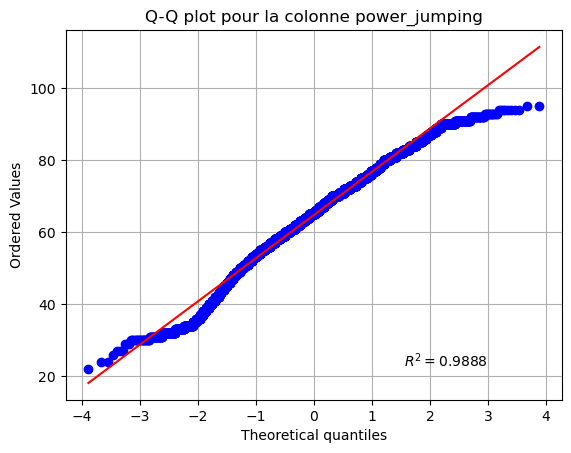

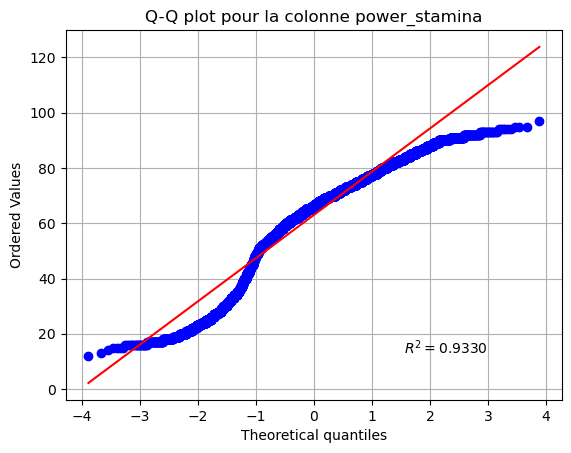

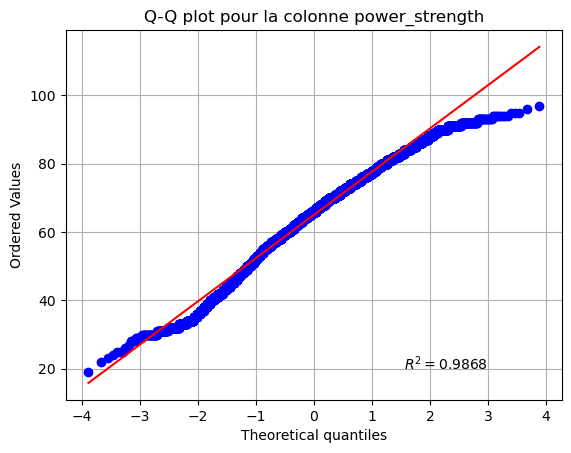

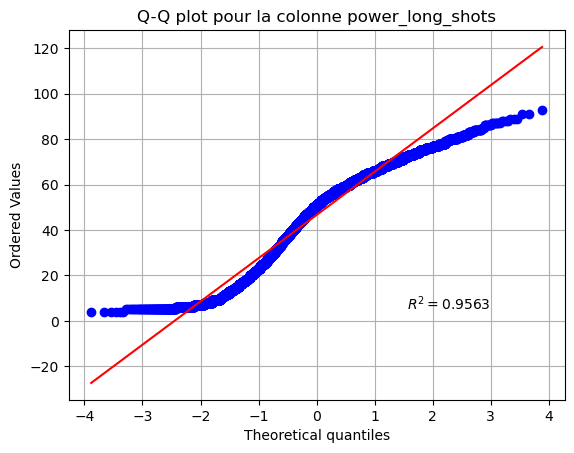

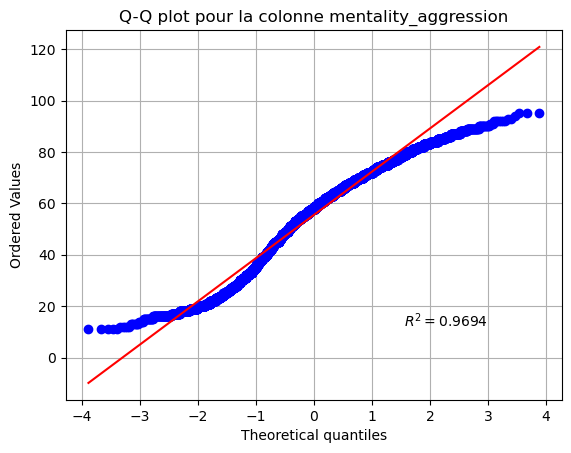

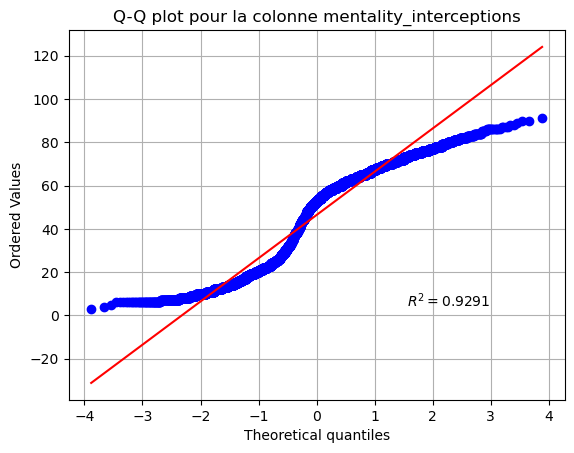

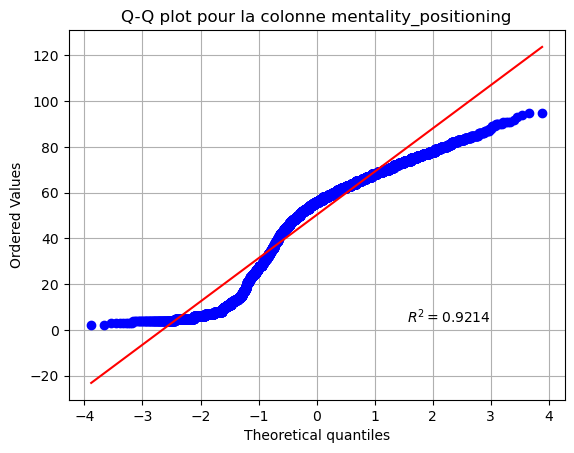

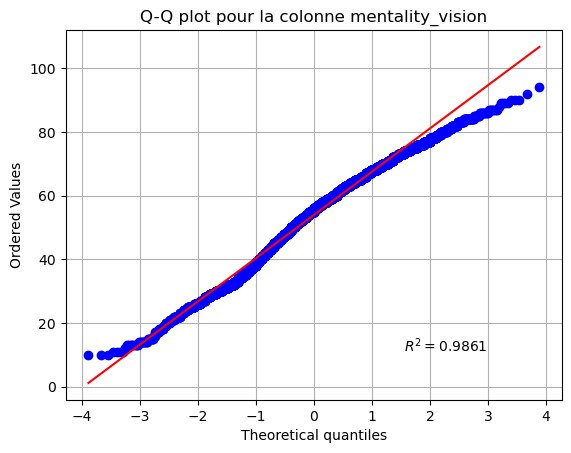

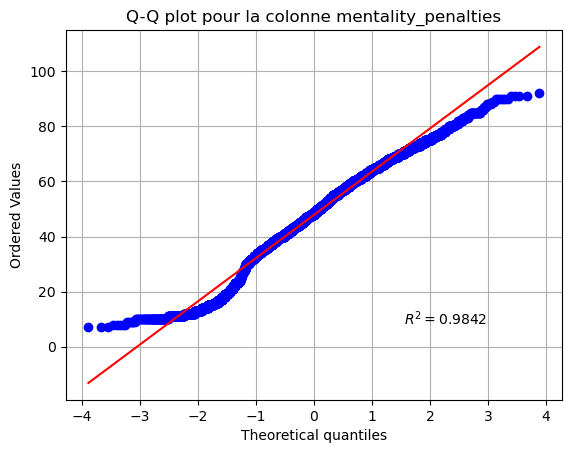

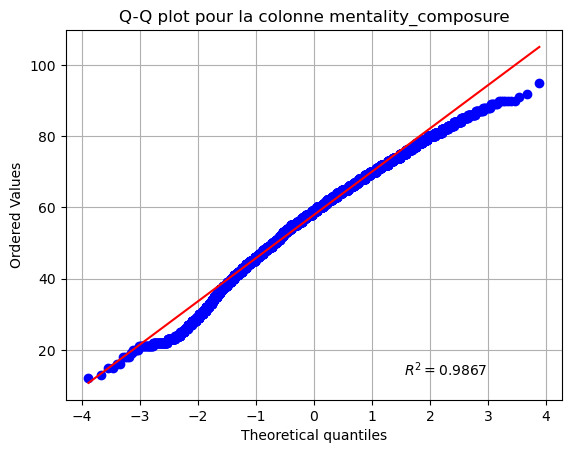

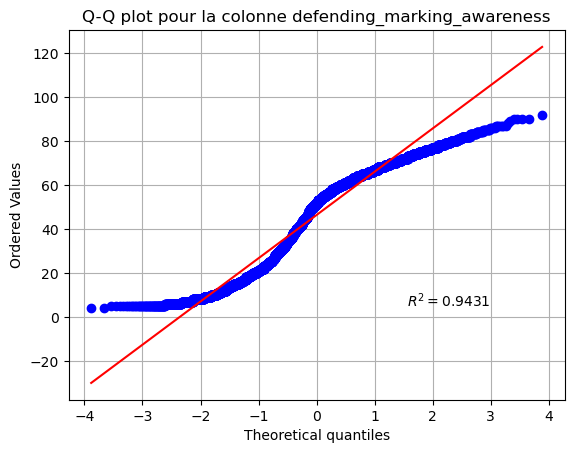

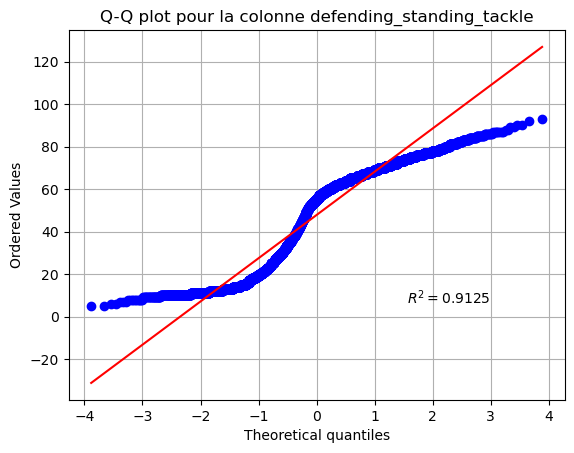

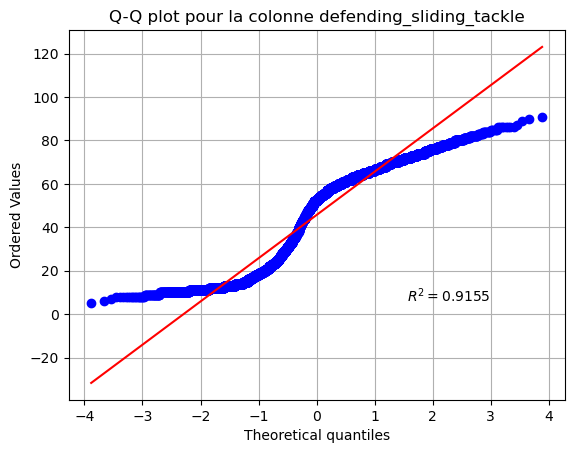

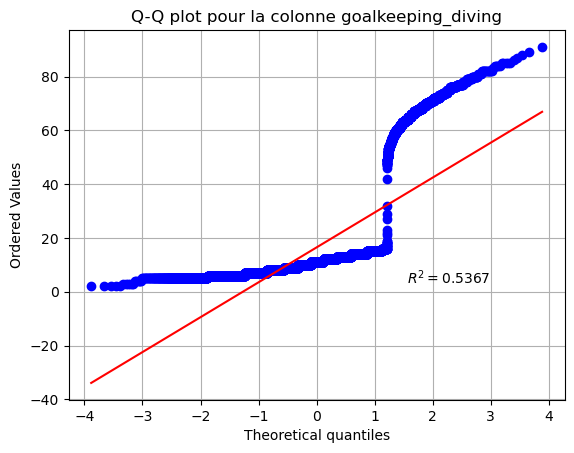

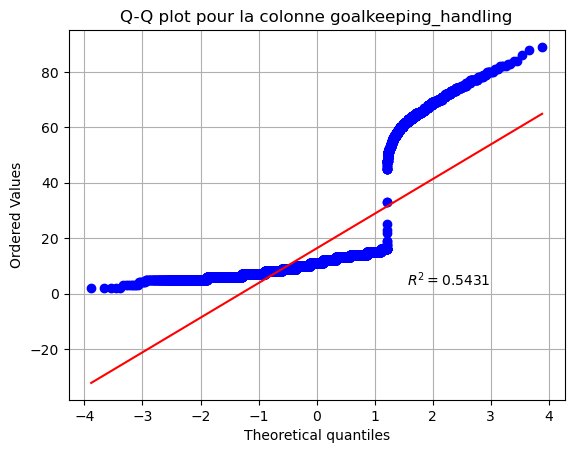

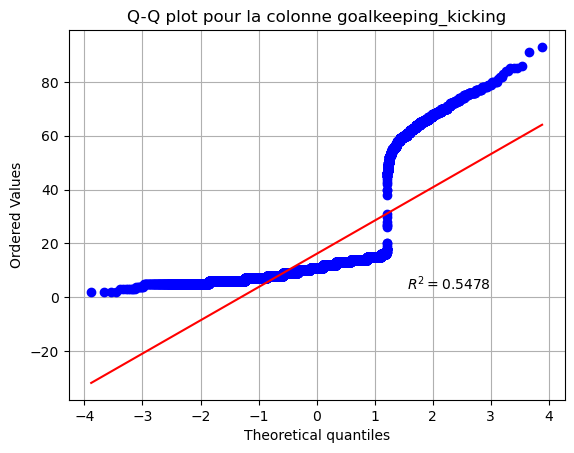

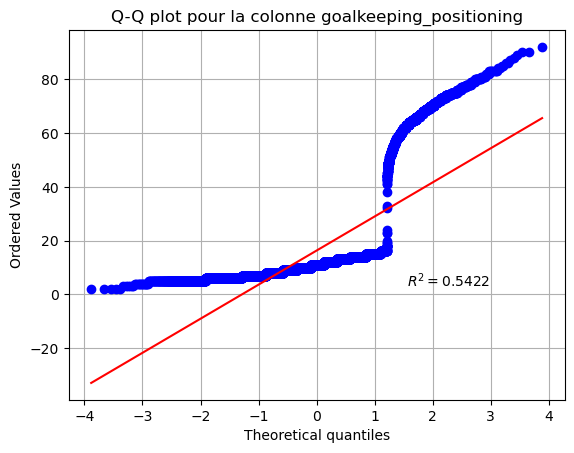

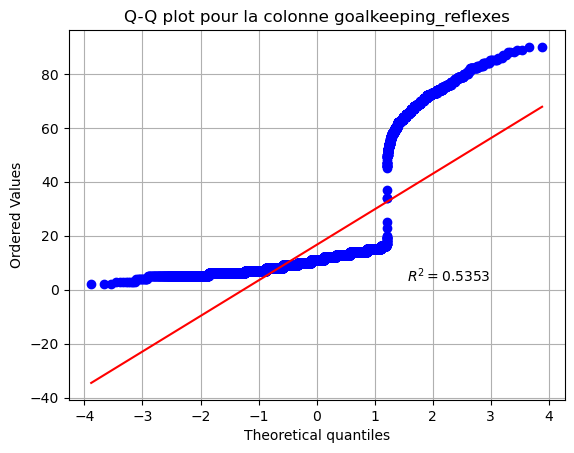

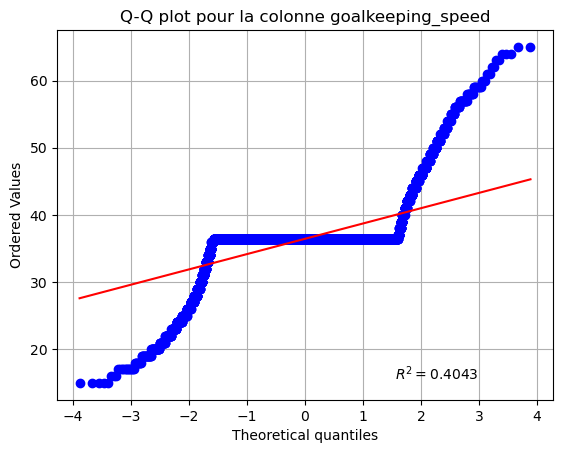

Columns close to normal distribution (R² > 0.97): ['potential', 'age', 'height_cm', 'weight_kg', 'shooting', 'passing', 'dribbling', 'physic', 'attacking_volleys', 'skill_curve', 'skill_fk_accuracy', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_strength', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
Columns not close to normal distribution (R² < 0.97): ['nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'pace', 'defending', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'skill_dribbling', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'power_stamina', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeepin

In [29]:
X_columns = X_train.columns.to_list()
norm_cols = []
non_norm_cols = []
for column in range(X_train.shape[1]):
  osm_osr, slope_intercept_r = stats.probplot(X_train.iloc[:, column], plot=plt, dist="norm", rvalue=True)
  r_square = slope_intercept_r[2]*slope_intercept_r[2]
  # print(slope_intercept_r[2]*slope_intercept_r[2])
  plt.title('Q-Q plot pour la colonne {}'.format(X_columns[column]))
  plt.grid()
  # Don't display plots, comment out the line below
  plt.show()

  if r_square > 0.97:
    norm_cols.append(X_columns[column])
  else:
    non_norm_cols.append(X_columns[column])

# Print or use norm_cols and non_norm_cols for further analysis
print("Columns close to normal distribution (R² > 0.97):", norm_cols)
print("Columns not close to normal distribution (R² < 0.97):", non_norm_cols)

**mettre les données à l'échèlle**

In [30]:
X_train_norm = X_train_balanced[norm_cols]
X_train_non_norm = X_train_balanced[non_norm_cols]

X_val_norm = X_val_balanced[norm_cols]
X_val_non_norm = X_val_balanced[non_norm_cols]

X_test_norm = X_test_balanced[norm_cols]
X_test_non_norm = X_test_balanced[non_norm_cols]

scaler_norm = MinMaxScaler()
scaler_stand = StandardScaler()

scaler_norm = scaler_norm.fit(X_train_norm)
scaler_stand = scaler_stand.fit(X_train_non_norm)

X_train_norm = scaler_norm.fit_transform(X_train_norm)
X_train_non_norm = scaler_stand.fit_transform(X_train_non_norm)

X_val_norm = scaler_norm.fit_transform(X_val_norm)
X_val_non_norm = scaler_stand.fit_transform(X_val_non_norm)

X_test_norm = scaler_norm.fit_transform(X_test_norm)
X_test_non_norm = scaler_stand.fit_transform(X_test_non_norm)

In [31]:
X_train_norm_df = pd.DataFrame(data= X_train_norm, columns=norm_cols)
X_val_norm_df = pd.DataFrame(data= X_val_norm, columns=norm_cols)
X_test_norm_df = pd.DataFrame(data= X_test_norm, columns=norm_cols)

X_train_non_norm_df = pd.DataFrame(data= X_train_non_norm, columns=non_norm_cols)
X_val_non_norm_df = pd.DataFrame(data= X_val_non_norm, columns=non_norm_cols)
X_test_non_norm_df = pd.DataFrame(data= X_test_non_norm, columns=non_norm_cols)

In [32]:
X_train_norm_df.head()

,potential,age,height_cm,weight_kg,shooting,passing,dribbling,physic,attacking_volleys,skill_curve,skill_fk_accuracy,movement_reactions,movement_balance,power_shot_power,power_jumping,power_strength,mentality_vision,mentality_penalties,mentality_composure
0,0.318182,0.342105,0.354167,0.288136,0.210526,0.397059,0.500000,0.500000,0.298851,0.431818,0.477273,0.492754,0.827160,0.173333,0.602740,0.423077,0.404762,0.317647,0.373494
1,0.386364,0.368421,0.312500,0.203390,0.394737,0.602941,0.578125,0.482759,0.390805,0.375000,0.443182,0.521739,0.827160,0.480000,0.780822,0.371795,0.654762,0.364706,0.518072
2,0.318182,0.289474,0.416667,0.406780,0.526316,0.500000,0.578125,0.672414,0.551724,0.500000,0.579545,0.507246,0.654321,0.640000,0.643836,0.615385,0.654762,0.658824,0.602410
3,0.613636,0.236842,0.208333,0.254237,0.684211,0.514706,0.734375,0.465517,0.712644,0.579545,0.488636,0.695652,0.888889,0.613333,0.863014,0.358974,0.666667,0.705882,0.722892
4,0.431818,0.315789,0.291667,0.203390,0.644737,0.602941,0.687500,0.413793,0.712644,0.681818,0.693182,0.594203,0.925926,0.666667,0.575342,0.384615,0.666667,0.611765,0.626506


In [33]:
X_train_non_norm_df.head()

,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,pace,defending,attacking_crossing,attacking_finishing,...,mentality_positioning,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,0.897648,-1.745429,0.279914,-0.164085,-1.495041,-0.943894,0.586510,0.619430,0.692562,-0.501697,...,0.110625,0.866117,1.008706,1.081091,-0.618739,-0.535784,-0.666466,-0.447756,-0.454029,-0.012635
1,1.167128,-1.745429,1.727547,-0.164085,0.464342,1.508110,-1.358858,0.889609,1.074676,0.190379,...,0.278415,1.097130,1.185313,1.400597,-0.369254,-0.709482,-0.400780,-0.790272,-0.780878,-0.012635
2,4.131408,-1.745429,0.279914,-0.164085,0.464342,-0.943894,-0.602326,0.822065,0.453741,0.406652,...,0.781785,0.912320,1.097009,0.852872,-0.743481,-0.535784,-0.400780,-0.362127,-0.699166,-0.012635
3,-0.988711,0.572925,3.175180,1.006792,-0.841913,1.508110,1.775347,-1.204284,0.788091,1.315001,...,1.201261,-0.612361,-0.536609,-0.562086,-0.701900,-0.405511,-0.577904,-0.533385,-0.658310,-0.012635
4,-0.651861,0.572925,0.279914,1.006792,0.464342,1.508110,0.262282,-0.191110,0.979148,1.012218,...,0.823733,0.496498,-0.050939,0.031283,-0.660319,-0.622633,-0.622185,-0.447756,-0.617454,-0.012635


In [34]:
X_val_norm_df.head()

,potential,age,height_cm,weight_kg,shooting,passing,dribbling,physic,attacking_volleys,skill_curve,skill_fk_accuracy,movement_reactions,movement_balance,power_shot_power,power_jumping,power_strength,mentality_vision,mentality_penalties,mentality_composure
0,0.463415,0.52,0.562500,0.425532,0.468772,0.521170,0.523654,0.573276,0.148148,0.060976,0.073171,0.571429,0.560000,0.405797,0.593750,0.529412,0.721519,0.094118,0.695122
1,0.463415,0.64,0.520833,0.510638,0.768116,0.725806,0.606061,0.627119,0.876543,0.743902,0.768293,0.587302,0.600000,0.739130,0.500000,0.632353,0.772152,0.776471,0.756098
2,0.219512,0.52,0.500000,0.404255,0.579710,0.483871,0.545455,0.389831,0.604938,0.548780,0.536585,0.412698,0.680000,0.565217,0.578125,0.470588,0.607595,0.458824,0.585366
3,0.560976,0.24,0.500000,0.595745,0.376812,0.532258,0.393939,0.610169,0.530864,0.390244,0.426829,0.412698,0.560000,0.463768,0.437500,0.691176,0.582278,0.494118,0.451220
4,0.292683,0.36,0.625000,0.531915,0.536232,0.451613,0.500000,0.644068,0.629630,0.548780,0.365854,0.507937,0.613333,0.565217,0.750000,0.764706,0.594937,0.529412,0.439024


In [35]:
X_val_non_norm_df.head()

,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,pace,defending,attacking_crossing,attacking_finishing,...,mentality_positioning,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,1.402461,0.578046,0.266289,-1.337542,0.494418,0.264555,-0.071968,0.183334,-1.510059,-1.261942,...,-1.138666,-0.516738,-0.810488,-1.024222,1.893018,1.921143,1.856943,2.030644,1.974099,2.696150
1,-0.848532,0.578046,1.701203,0.981144,-1.485641,-0.948287,-1.619742,-0.888648,1.005136,1.322582,...,1.485748,-0.746164,-0.059836,-0.158445,-0.537945,-0.666340,-0.445909,-0.623985,-0.452615,0.064493
2,4.267363,-1.729965,0.266289,0.981144,0.494418,-0.948287,-0.312967,-1.639544,0.340745,0.848753,...,0.569286,-0.700279,-0.898800,-1.069789,-0.454119,-0.490918,-0.623052,-0.711022,-0.534876,0.064493
3,0.140541,-1.729965,0.266289,-0.178199,1.154438,-0.948287,0.884910,0.749671,0.150919,0.116471,...,0.360999,1.135131,0.911596,1.117437,-0.454119,-0.710196,-0.755909,-0.449911,-0.658269,0.064493
4,-0.746215,-1.729965,0.266289,-0.178199,1.154438,0.870976,-0.312967,-1.025174,0.672941,0.676451,...,0.402656,-0.287312,-0.413084,-0.522983,-0.412206,-0.403206,-0.711623,-0.406392,-0.617138,0.064493


In [36]:
X_test_norm_df.head()

,potential,age,height_cm,weight_kg,shooting,passing,dribbling,physic,attacking_volleys,skill_curve,skill_fk_accuracy,movement_reactions,movement_balance,power_shot_power,power_jumping,power_strength,mentality_vision,mentality_penalties,mentality_composure
0,0.636364,0.074074,0.478261,0.339623,0.459459,0.609375,0.597015,0.482759,0.523810,0.632184,0.704545,0.468750,0.746667,0.534247,0.390625,0.506849,0.678571,0.482353,0.594937
1,0.704545,0.296296,0.391304,0.320755,0.743243,0.687500,0.761194,0.689655,0.690476,0.678161,0.715909,0.703125,0.840000,0.753425,0.640625,0.547945,0.738095,0.717647,0.746835
2,0.454545,0.185185,0.586957,0.490566,0.459459,0.421875,0.552239,0.517241,0.511905,0.563218,0.545455,0.375000,0.666667,0.438356,0.312500,0.506849,0.535714,0.411765,0.405063
3,0.431818,0.259259,0.521739,0.433962,0.189189,0.281250,0.477612,0.672414,0.297619,0.344828,0.272727,0.390625,0.640000,0.150685,0.515625,0.616438,0.369048,0.388235,0.367089
4,0.386364,0.148148,0.500000,0.490566,0.337838,0.390625,0.492537,0.448276,0.333333,0.448276,0.386364,0.265625,0.626667,0.465753,0.421875,0.493151,0.523810,0.435294,0.443038


In [37]:
X_test_non_norm_df.head()

,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,body_type,pace,defending,attacking_crossing,attacking_finishing,...,mentality_positioning,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,-0.795354,0.568751,0.277411,1.018505,0.46562,-0.345640,-0.304762,0.009060,0.417925,0.289275,...,0.295549,0.503113,0.476817,0.534045,-0.576844,-0.537459,-0.802800,-0.702683,-0.409589,-0.020451
1,0.145349,-1.758240,1.722918,2.194674,-0.84432,-0.345640,1.537660,0.144647,1.041837,1.206980,...,1.145101,0.733551,0.521214,-0.063402,-0.702365,-0.668354,-0.401096,-0.659582,-0.656378,-0.020451
2,-0.760513,0.568751,0.277411,1.018505,0.46562,-0.949969,0.453882,-1.279022,0.561905,0.464076,...,0.465460,-0.741252,-0.189132,-0.201274,-0.618685,-0.406565,-0.356462,-0.487178,-0.697510,-0.020451
3,1.887391,0.568751,-1.168097,1.018505,0.46562,-0.949969,2.404681,0.483616,0.369932,-0.453629,...,0.040684,0.825726,0.876387,0.901704,-0.702365,-0.668354,-0.401096,-0.616481,-0.450720,-0.020451
4,1.538983,0.568751,0.277411,-0.157663,1.12059,-0.345640,-0.629895,0.280235,-0.637926,-0.016627,...,-0.086749,0.871813,0.920783,0.396172,-0.409484,-0.493828,-0.490363,-0.357875,-0.532983,-0.020451


In [75]:
X_train_scale_df = pd.concat([X_train_norm_df, X_train_non_norm_df], axis=1)
X_val_scale_df = pd.concat([X_val_norm_df, X_val_non_norm_df], axis=1)
X_test_scale_df = pd.concat([X_test_norm_df, X_test_non_norm_df], axis=1)

In [76]:
train_scale_df = pd.concat([X_train_scale_df, y_train_balanced], axis=1)
val_scale_df = pd.concat([X_val_scale_df, y_val_balanced], axis=1)
test_scale_df = pd.concat([X_test_scale_df, y_test_balanced], axis=1)

In [77]:
train_scale_df.shape, val_scale_df.shape, test_scale_df.shape

((20180, 52), (4424, 52), (4476, 52))

In [78]:
y_train_balanced.shape, y_val_balanced.shape, y_test_balanced.shape

((20180,), (4424,), (4476,))

In [79]:
# Reset index for feature DataFrames
X_train_scale_df = X_train_scale_df.reset_index(drop=True)
X_val_scale_df = X_val_scale_df.reset_index(drop=True)
X_test_scale_df = X_test_scale_df.reset_index(drop=True)

# Reset index for target Series/DataFrames
y_train_balanced = y_train_balanced.reset_index(drop=True)
y_val = y_val_balanced.reset_index(drop=True)
y_test = y_test_balanced.reset_index(drop=True)

# Now concatenate them
train_scale_df = pd.concat([X_train_scale_df, y_train_balanced], axis=1)
val_scale_df = pd.concat([X_val_scale_df, y_val], axis=1)
test_scale_df = pd.concat([X_test_scale_df, y_test], axis=1)

In [82]:
print(test_scale_df.columns[test_scale_df.isna().any()].tolist())

[]


In [47]:
train_scale_df.to_csv('train_scale_df.csv')
val_scale_df.to_csv('val_scale_df.csv')
test_scale_df.to_csv('test_scale_df.csv')

In [83]:
train_scale_df

,potential,age,height_cm,weight_kg,shooting,passing,dribbling,physic,attacking_volleys,skill_curve,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,game_zone
0,0.318182,0.342105,0.354167,0.288136,0.210526,0.397059,0.500000,0.500000,0.298851,0.431818,...,0.866117,1.008706,1.081091,-0.618739,-0.535784,-0.666466,-0.447756,-0.454029,-0.012635,1
1,0.386364,0.368421,0.312500,0.203390,0.394737,0.602941,0.578125,0.482759,0.390805,0.375000,...,1.097130,1.185313,1.400597,-0.369254,-0.709482,-0.400780,-0.790272,-0.780878,-0.012635,1
2,0.318182,0.289474,0.416667,0.406780,0.526316,0.500000,0.578125,0.672414,0.551724,0.500000,...,0.912320,1.097009,0.852872,-0.743481,-0.535784,-0.400780,-0.362127,-0.699166,-0.012635,1
3,0.613636,0.236842,0.208333,0.254237,0.684211,0.514706,0.734375,0.465517,0.712644,0.579545,...,-0.612361,-0.536609,-0.562086,-0.701900,-0.405511,-0.577904,-0.533385,-0.658310,-0.012635,3
4,0.431818,0.315789,0.291667,0.203390,0.644737,0.602941,0.687500,0.413793,0.712644,0.681818,...,0.496498,-0.050939,0.031283,-0.660319,-0.622633,-0.622185,-0.447756,-0.617454,-0.012635,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20175,0.340909,0.263158,0.520833,0.338983,0.578947,0.364837,0.561007,0.529717,0.505747,0.431818,...,-0.335146,-0.713217,-0.927236,-0.535577,-0.666058,-0.533623,-0.362127,-0.413172,-0.012635,3
20176,0.477273,0.078947,0.708333,0.474576,0.547346,0.332390,0.487513,0.568893,0.597701,0.386364,...,-0.750968,-0.757368,-0.927236,-0.535577,-0.492360,-0.445061,-0.533385,-0.617454,-0.012635,3
20177,0.477273,0.315789,0.583333,0.423729,0.701698,0.475465,0.650948,0.569010,0.804598,0.670455,...,-0.104134,-1.110583,-0.927236,-0.410835,-0.535784,-0.533623,-0.533385,-0.699166,-0.012635,3
20178,0.750000,0.342105,0.520833,0.389831,0.825406,0.838235,0.884606,0.589528,0.850575,0.897727,...,-0.196539,-0.271698,-0.470798,-0.618739,-0.535784,-0.755028,-0.704643,-0.454029,-0.012635,3


In [49]:
joblib.dump(scaler_norm, 'scaler_norm.gz')
joblib.dump(scaler_stand, 'scaler_stand.gz')

['scaler_stand.gz']

In [50]:
train_scale_df = pd.read_csv('train_scale_df.csv')
val_scale_df = pd.read_csv('val_scale_df.csv')
test_scale_df = pd.read_csv('test_scale_df.csv')

In [51]:
X_train_scale_df = train_scale_df.drop(columns='game_zone', axis=1)
y_train_balanced = train_scale_df['game_zone']

In [52]:
X_train_scale_df.isna().sum().sum()

0

In [53]:
scaler_norm = joblib.load('scaler_norm.gz')
scaler_stand = joblib.load('scaler_stand.gz')

In [54]:
with open("normal_columns.txt", "w") as f:
  for item in norm_cols:
    f.write(item + "\n")

print("List saved to normal_columns.txt")

with open("non_normal_columns.txt", "w") as f:
  for item in non_norm_cols:
    f.write(item + "\n")

print("List saved to non_normal_columns.txt")

List saved to normal_columns.txt
List saved to non_normal_columns.txt


In [55]:
norm_cols = []

with open("normal_columns.txt", "r") as f:
  for line in f:
    norm_cols.append(line.strip())

print("Loaded list:", norm_cols)

non_norm_cols = []

with open("non_normal_columns.txt", "r") as f:
  for line in f:
    non_norm_cols.append(line.strip())

print("Loaded list:", non_norm_cols)

Loaded list: ['potential', 'age', 'height_cm', 'weight_kg', 'shooting', 'passing', 'dribbling', 'physic', 'attacking_volleys', 'skill_curve', 'skill_fk_accuracy', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_strength', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
Loaded list: ['nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'pace', 'defending', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'skill_dribbling', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'power_stamina', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_re

**Gradien-Descent**

# SVM

In [ ]:
svc = SVC(C= 0.001,
          gamma=0.01,
          kernel='poly',
          degree=5,
          coef0=3,
          shrinking=True,
          probability=True,
          decision_function_shape="ovr")

svc.fit(X_train_scale_df, y_train_balanced)

In [ ]:
y_pred = svc.predict(X_test_scale_df)

In [ ]:
print("POLY Kernel Results:")
print(confusion_matrix(y_test_balanced, y_pred))
print(classification_report(y_test_balanced, y_pred))

POLY Kernel Results:
[[316   0   0   0]
 [  0 979 135   5]
 [  0  50 685 206]
 [  0   1  71 438]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       0.95      0.87      0.91      1119
           2       0.77      0.73      0.75       941
           3       0.67      0.86      0.76       510

    accuracy                           0.84      2886
   macro avg       0.85      0.87      0.85      2886
weighted avg       0.85      0.84      0.84      2886



In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['rbf']
}

param_grid_poly = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 10],
    'kernel': ['poly']
}

# Initialize GridSearchCV for RBF kernel
grid_search_rbf = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_rbf.fit(X_train_scale_df, y_train_balanced)

# Initialize GridSearchCV for Polynomial kernel
grid_search_poly = GridSearchCV(estimator=SVC(), param_grid=param_grid_poly, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_poly.fit(X_train_scale_df, y_train_balanced)

# Print the best parameters and the best score for RBF kernel
print("Best parameters found for RBF kernel: ", grid_search_rbf.best_params_)
print("Best cross-validation accuracy for RBF kernel: {:.2f}".format(grid_search_rbf.best_score_))

# Print the best parameters and the best score for Polynomial kernel
print("Best parameters found for Polynomial kernel: ", grid_search_poly.best_params_)
print("Best cross-validation accuracy for Polynomial kernel: {:.2f}".format(grid_search_poly.best_score_))

# Evaluate the best model from RBF kernel search
best_svc_rbf = grid_search_rbf.best_estimator_
y_pred_rbf = best_svc_rbf.predict(X_test_scale_df)

print("RBF Kernel Results:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Evaluate the best model from Polynomial kernel search
best_svc_poly = grid_search_poly.best_estimator_
y_pred_poly = best_svc_poly.predict(X_test)

print("Polynomial Kernel Results:")
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Fitting 5 folds for each of 63 candidates, totalling 315 fits


KeyboardInterrupt: 

In [ ]:
# Define the parameter grid based on the kernel you choose
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid', 'precomputed'],  # Can also be 'linear', 'poly', etc.
    'gamma': ['scale', 'auto' ,0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1, 2, 3, 4, 5],
    'decision_function_shape': ['ovo', 'ovr']
}

# Initialize the SVC model
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


# ANN

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import seaborn as sns

In [85]:
X_train_balanced.columns

Index(['potential', 'age', 'height_cm', 'weight_kg', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping

In [86]:
X_train_scale_df.columns

Index(['potential', 'age', 'height_cm', 'weight_kg', 'shooting', 'passing',
       'dribbling', 'physic', 'attacking_volleys', 'skill_curve',
       'skill_fk_accuracy', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_strength',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'pace', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'skill_dribbling', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'power_stamina', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping

In [87]:
X_train_balanced.shape[1], X_train_scale_df.shape[1]

(51, 51)

In [88]:
X_train_scale_df.columns

Index(['potential', 'age', 'height_cm', 'weight_kg', 'shooting', 'passing',
       'dribbling', 'physic', 'attacking_volleys', 'skill_curve',
       'skill_fk_accuracy', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_strength',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'pace', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'skill_dribbling', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'power_stamina', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping

In [90]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train_balanced)
y_val_onehot = to_categorical(y_val_balanced)
y_test_onehot = to_categorical(y_test_balanced)

In [100]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_balanced)
encoded_y_train = encoder.transform(y_train_balanced)
encoded_y_val = encoder.transform(y_val_balanced)
encoded_y_test = encoder.transform(y_test_balanced)

In [101]:
input_shape = X_train_balanced.shape[1]

In [116]:
from tensorflow.keras.layers import Input

In [120]:
model = Sequential()
model.add(Input((input_shape,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,700 (178.52 KB)

 Trainable params: 45,700 (178.52 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
print(encoded_y_train)

[1 1 1 ... 3 3 3]


In [80]:
train_data = train_scale_df.to_numpy()
validation_data = val_scale_df.to_numpy()
X_validation = X_val_scale_df.to_numpy()

In [81]:
y_train_balanced.shape

(20180,)

In [82]:
X_val_scale_df.shape, y_val.shape

((4424, 51), (4424,))

In [111]:
import math
BATCH_SIZE = 128
#steps_per_epoch = len(X_train_scale_df) // BATCH_SIZE
steps_per_epoch = math.ceil(len(X_train_scale_df) / BATCH_SIZE)

In [114]:
y_train_onehot.shape, y_val_onehot.shape, y_test_onehot.shape, X_train_balanced.shape, X_val_balanced.shape, X_test_balanced.shape

((20180, 4), (4424, 4), (4476, 4), (20180, 51), (4424, 51), (4476, 51))

In [122]:
#model.reset_states()
history2 = model.fit(
    X_train_balanced,
    encoded_y_train,
    #steps_per_epoch=steps_per_epoch,
    epochs = 30,
    #validation_split=0.2,
    validation_data = (X_val_balanced, encoded_y_val),
    verbose = 1,
    batch_size=BATCH_SIZE,
)

Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)

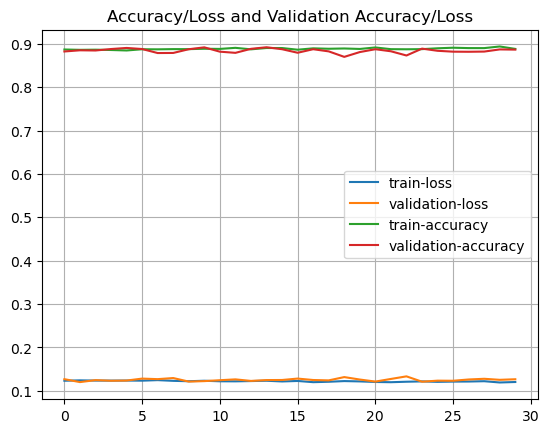

<Figure size 640x480 with 0 Axes>

In [133]:
plt.plot(history.history['loss'], label='train-loss')
plt.plot(history.history['val_loss'], label='validation-loss')
plt.plot(history.history['accuracy'], label='train-accuracy')
plt.plot(history.history['val_accuracy'], label='validation-accuracy')
plt.title('Accuracy/Loss and Validation Accuracy/Loss')
plt.legend()
plt.grid()
plt.show()
plt.savefig('Accuracy&Loss and Validation Accuracy&Loss3.png')

In [115]:
#model.reset_states()
history = model.fit(
    X_train_balanced,
    y_train_onehot,
    #steps_per_epoch=steps_per_epoch,
    epochs = 30,
    #validation_split=0.2,
    validation_data = (X_val_balanced, y_val_onehot),
    verbose = 1,
    batch_size=BATCH_SIZE,
)

Epoch 1/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.1261 - val_accuracy: 0.8822 - val_loss: 0.1267
Epoch 2/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8893 - loss: 0.1214 - val_accuracy: 0.8849 - val_loss: 0.1200
Epoch 3/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8875 - loss: 0.1227 - val_accuracy: 0.8845 - val_loss: 0.1245
Epoch 4/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8861 - loss: 0.1222 - val_accuracy: 0.8879 - val_loss: 0.1231
Epoch 5/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8864 - loss: 0.1218 - val_accuracy: 0.8904 - val_loss: 0.1236
Epoch 6/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8907 - loss: 0.1221 - val_accuracy: 0.8879 - val_loss: 0.1281
Epoch 7/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8903 - loss: 0.1236 - val_accuracy: 0.8786 - val_loss: 0.1268
Epoch 8/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss: 0.1231 - val_accuracy: 0.

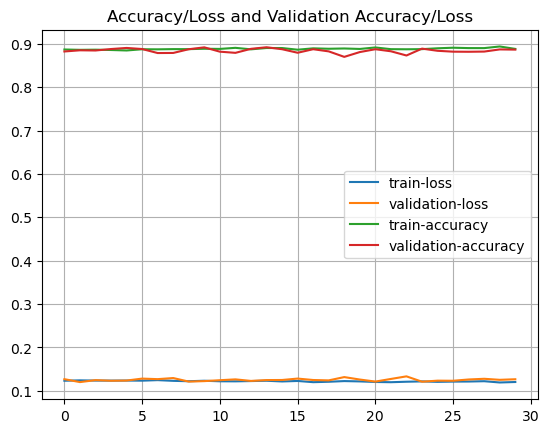

<Figure size 640x480 with 0 Axes>

In [116]:
plt.plot(history.history['loss'], label='train-loss')
plt.plot(history.history['val_loss'], label='validation-loss')
plt.plot(history.history['accuracy'], label='train-accuracy')
plt.plot(history.history['val_accuracy'], label='validation-accuracy')
plt.title('Accuracy/Loss and Validation Accuracy/Loss')
plt.legend()
plt.grid()
plt.show()
plt.savefig('Accuracy&Loss and Validation Accuracy&Loss.png')

In [134]:
predictions = model.predict(X_test_balanced)

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [135]:
predictions

array([[2.9483522e-07, 1.7830707e-02, 9.5565021e-01, 2.5255462e-02],
       [2.7565108e-07, 5.4553640e-03, 5.7658172e-01, 3.6801448e-01],
       [2.4698483e-07, 8.3761429e-03, 5.1589340e-01, 4.3770531e-01],
       ...,
       [1.5121341e-06, 1.5068622e-03, 2.6850492e-01, 6.9789696e-01],
       [1.5788057e-05, 6.7450193e-04, 2.1165974e-02, 9.7332841e-01],
       [1.5750822e-05, 6.7013496e-04, 2.4330148e-02, 9.6980989e-01]],
      dtype=float32)

In [136]:
X_test_balanced.shape, y_test_onehot.shape

((4476, 51), (4476, 4))

In [137]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_balanced, y_test_onehot)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8640 - loss: 0.1563
Test accuracy: 0.8755585551261902
Test loss: 0.13660189509391785


In [138]:
y_pred = model.predict(y_test_onehot)

InvalidArgumentError: Graph execution error:

Detected at node sequential_2_1/dense_10_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "D:\Anaconda\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 80, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4984\4156177502.py", line 1, in <module>

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 504, in predict

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 204, in one_step_on_data_distributed

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 194, in one_step_on_data

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 92, in predict_step

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\models\sequential.py", line 206, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 199, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 589, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py", line 154, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 17, in relu

Matrix size-incompatible: In[0]: [32,4], In[1]: [51,64]
	 [[{{node sequential_2_1/dense_10_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_68981]

In [110]:
# Step 1: Make Predictions
y_pred = model.predict(y_test_onehot)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_balanced, axis=1)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_5_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "D:\Anaconda\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 80, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4984\1111086811.py", line 8, in <module>

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 504, in predict

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 204, in one_step_on_data_distributed

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 194, in one_step_on_data

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 92, in predict_step

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\models\sequential.py", line 206, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 199, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 589, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py", line 154, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 17, in relu

Matrix size-incompatible: In[0]: [32,4], In[1]: [51,64]
	 [[{{node sequential_1_1/dense_5_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_32025]

In [105]:


# Step 2: Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Step 3: Generate Classification Report
class_report = classification_report(y_true, y_pred_classes)
print(class_report)

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.8574 - loss: 0.1574
Test accuracy: 0.8766756057739258
Test loss: 0.13615891337394714


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_5_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "D:\Anaconda\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 80, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4984\1111086811.py", line 8, in <module>

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 504, in predict

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 204, in one_step_on_data_distributed

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 194, in one_step_on_data

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 92, in predict_step

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\models\sequential.py", line 206, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 199, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 589, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py", line 154, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 17, in relu

Matrix size-incompatible: In[0]: [32,4], In[1]: [51,64]
	 [[{{node sequential_1_1/dense_5_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_32025]

In [103]:
# Step 4: Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8574 - loss: 0.1574
Test accuracy: 0.8766756057739258
Test loss: 0.13615891337394714


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_5_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "D:\Anaconda\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 80, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4984\1111086811.py", line 8, in <module>

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 504, in predict

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 204, in one_step_on_data_distributed

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 194, in one_step_on_data

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 92, in predict_step

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\models\sequential.py", line 206, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 199, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 589, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py", line 154, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "D:\Anaconda\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 17, in relu

Matrix size-incompatible: In[0]: [32,4], In[1]: [51,64]
	 [[{{node sequential_1_1/dense_5_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_32025]